# Import Modules

**Run the cell below to import the relevant modules by running the cell. Select it and type ``shift`` + ``enter``.**

In [1]:
import os
import sys

import numpy as np

ROOT_DIR = os.getcwd()[:os.getcwd().rfind('quantum_HEOM')] + 'quantum_HEOM'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

from quantum_heom import figures as figs
from quantum_heom.quantum_system import QuantumSystem
from quantum_heom import utilities as util

# Introduction

In previous tutorials we have seen how to set up a ``QuantumSystem`` object with various parameters, the unit system used under-the-hood of ``quantum_HEOM``, and how to make various plots, including those comparing different systems, spectral desnities, and trace metrics.

In this tutorial, we will show how the interactions in the system can be explicitly defined and controlled specifying a custom Hamiltonian, in contrast to using an in-built interaction model.

First though, let's briefly recap how we used the in-built interaction models to define a ``QuantumSystem`` for the 7-site FMO complex.

### Recap: In-Built Interaction Model

We'll plot the dynamics of the FMO complex using ``interaction_model='FMO'``, as seen in previous tutorials.

This sets the system Hamiltonian for the contructed ``QuantumSystem`` to an FMO Hamiltonian, which was constructed by Iles-Smith *et al.* (J. Chem. Phys. 144, 044110, 2016, DOI: https://doi.org/10.1063/1.4940218) using site energy and coupling parameters experimentally calculated by Adolphs and Renger (Biophysical Journal, 2006, 91, 2778–2797).

To recap, we define the system parameters then set up the ``QuantumSystem`` object as follows:

In [2]:
args1 = {'sites': 7, 
         'init_site_pop': [1], 
         'interaction_model': 'FMO',
         'dynamics_model': 'local thermalising lindblad', 
         'time_interval': 5.0, 
         'timesteps': 500, 
         'deph_rate': 11
        }

q1 = QuantumSystem(**args1)

Now we can plot the dynamics:

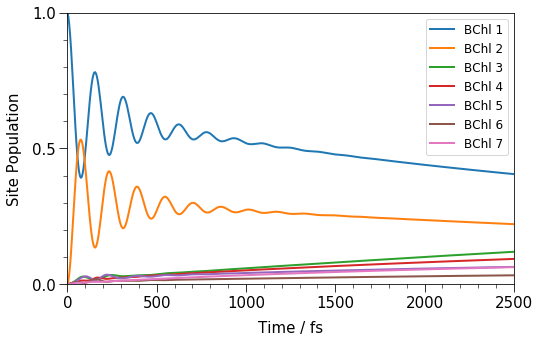

In [3]:
# Define settings and plot dynamics
plot_args = {'elements': 'diagonals', 'trace_measure': [None], 
             'asymptote': False, 'view_3d': False, 'save': False}

figs.plot_dynamics(q1, **plot_args)

### Custom Interaction Model

Now let's plot the dynamics of the FMO system where the interactions are described with a different form of the Hamiltonian. 

A custom Hamiltonian has been stored in the file at relative path ``./Cho_Hamiltonian.dat``, corresponding to a Hamiltonian for the FMO complex generated by Cho *et al.* (Journal of Physical Chemistry B, 2005, 109, 10542–10556, DOI: https://doi.org/10.1021/jp050788d).

This time, we set ``interaction_model='custom'`` and the file path of the custom Hamiltonian (as a string) is passed. This is still a 7-site system, so the ``sites`` parameter is set to ``7``, matching the dimension of the Hamiltonian as always.

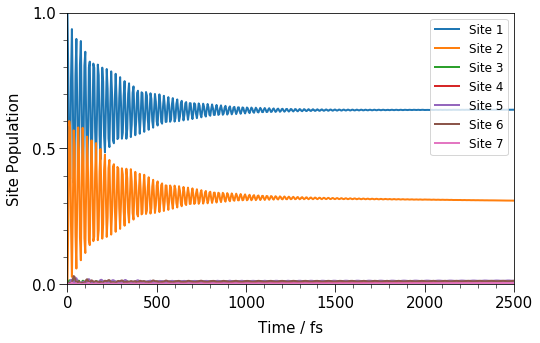

In [4]:
args2 = {'sites': 7, 
         'init_site_pop': [1], 
         'interaction_model': 'custom',
         'custom_hamiltonian': 'Cho_Hamiltonian.dat',
         'dynamics_model': 'local thermalising lindblad', 
         'time_interval': 5.0, 
         'timesteps': 500, 
         'deph_rate': 11
        }

q2 = QuantumSystem(**args2)

figs.plot_dynamics(q2, **plot_args)

You'll notice by eyeball-comparison with the previous plot that the results are very different! What's going on - surely a slightly different Hamiltonian for the same system can't produce such a massive difference in dynamics?

Let's check the Hamiltonian for the first QuantumSystem, ``q1``, using the ``hamiltonian`` property:

In [5]:
q1.hamiltonian

array([[ 2.33761160e+03, -1.65196242e+01,  1.03600836e+00,
        -1.11135442e+00,  1.26204655e+00, -2.58060265e+00,
        -1.86481505e+00],
       [-1.65196242e+01,  2.36021541e+03,  5.80164683e+00,
         1.54459429e+00,  1.31855610e-01,  2.22270885e+00,
         8.09970174e-01],
       [ 1.03600836e+00,  5.80164683e+00,  2.29993856e+03,
        -1.00775359e+01, -4.14403345e-01, -1.80830550e+00,
         1.13019094e+00],
       [-1.11135442e+00,  1.54459429e+00, -1.00775359e+01,
         2.32065873e+03, -1.33174166e+01, -3.20220766e+00,
        -1.19235144e+01],
       [ 1.26204655e+00,  1.31855610e-01, -4.14403345e-01,
        -1.33174166e+01,  2.35079716e+03,  1.52764142e+01,
        -2.44874704e-01],
       [-2.58060265e+00,  2.22270885e+00, -1.80830550e+00,
        -3.20220766e+00,  1.52764142e+01,  2.37905193e+03,
         7.47809672e+00],
       [-1.86481505e+00,  8.09970174e-01,  1.13019094e+00,
        -1.19235144e+01, -2.44874704e-01,  7.47809672e+00,
         2.3432625

Now we can check the ``hamiltonian`` property of our second QuantumSystem ``q2``:

In [6]:
q2.hamiltonian

array([[ 280., -106.,    8.,   -5.,    6.,   -8.,   -4.],
       [-106.,  420.,   28.,    6.,    2.,   13.,    1.],
       [   8.,   28.,    0.,  -62.,   -1.,   -9.,   17.],
       [  -5.,    6.,  -62.,  175.,  -70.,  -19.,  -57.],
       [   6.,    2.,   -1.,  -70.,  320.,   40.,   -2.],
       [  -8.,   13.,   -9.,  -19.,   40.,  360.,   32.],
       [  -4.,    1.,   17.,  -57.,   -2.,   32.,  260.]])

The values are vastly different, sometimes by an order of magnitude. The problem here is very simple - we've passed our custom Hamiltonian to ``quantum_HEOM`` in units of **cm^-1**, which is inconsistent with the **rad ps^-1** convention used internally.

Let's convert our Hamiltonian from **cm^-1** to **rad ps^-1** and obsverve the change. First use the in-built utility function the creates a conversion factor.

In [7]:
conversion_factor = util.unit_conversion(1, 'cm^-1', 'rad ps^-1')
print('Conversion factor : ', conversion_factor, 'rad ps^-1 (= 1 cm^-1)')

Conversion factor :  0.1883651567308853 rad ps^-1 (= 1 cm^-1)


Now let's load our Cho Hamiltonian in **cm^-1** and convert it using the conversion factor:

In [8]:
cho_hamiltonian = np.loadtxt('Cho_Hamiltonian.dat') * conversion_factor  # now in rad ps^-1
cho_hamiltonian

array([[ 52.74224388, -19.96670661,   1.50692125,  -0.94182578,
          1.13019094,  -1.50692125,  -0.75346063],
       [-19.96670661,  79.11336583,   5.27422439,   1.13019094,
          0.37673031,   2.44874704,   0.18836516],
       [  1.50692125,   5.27422439,   0.        , -11.67863972,
         -0.18836516,  -1.69528641,   3.20220766],
       [ -0.94182578,   1.13019094, -11.67863972,  32.96390243,
        -13.18556097,  -3.57893798, -10.73681393],
       [  1.13019094,   0.37673031,  -0.18836516, -13.18556097,
         60.27685015,   7.53460627,  -0.37673031],
       [ -1.50692125,   2.44874704,  -1.69528641,  -3.57893798,
          7.53460627,  67.81145642,   6.02768502],
       [ -0.75346063,   0.18836516,   3.20220766, -10.73681393,
         -0.37673031,   6.02768502,  48.97494075]])

Now we can re-construct our second QuantumSystem ``q2`` using the correct units for the Hamiltonian, and plot its dynamics.

Notice in the next cell that we can also pass a ``np.ndarray`` to the ``custom_hamiltonian`` parameter, as well as a ``str`` file path.

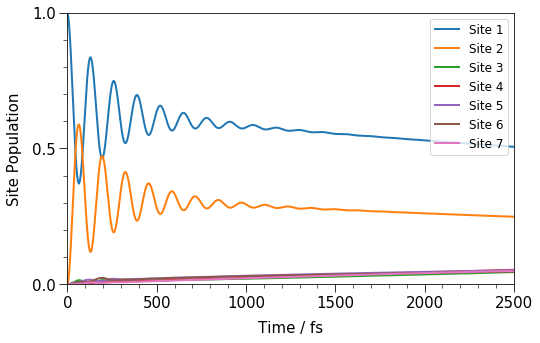

In [9]:
args2 = {'sites': 7, 
         'init_site_pop': [1], 
         'interaction_model': 'custom',
         'custom_hamiltonian': cho_hamiltonian,
         'dynamics_model': 'local thermalising lindblad', 
         'time_interval': 5.0, 
         'timesteps': 500, 
         'deph_rate': 11
        }

q2 = QuantumSystem(**args2)

figs.plot_dynamics(q2, **plot_args)

The dynamics, at least qualitatively, seem to agree much better. Let's plot the Site 1 population for each system overlayed on the same plot to compare.

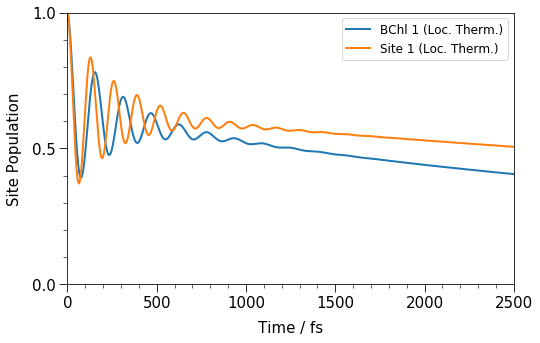

In [10]:
# Define settings and plot dynamics with an overlay comparison
plot_args_comparison = {'elements': ['11'], 'trace_measure': [None], 
                        'asymptote': False, 'view_3d': False, 'save': False}

figs.plot_dynamics([q1, q2], **plot_args_comparison)

... still different, as you would expect with different Hamiltonians, but much more similar than when using inconsistent units!

# Summary

Hopefully this tutorial has shown you the basics of how to define your own custom interaction model and system Hamiltonian, allowing you to not be restricted to those built in.

**Important points**:
* The Hamiltonian, as always, must be square and real valued. Its dimensions should match those indicated as the number of sites.
* The units should be passed in rad ps^-1 in order to remain consistent with the internal unit conversion. If using a Hamiltonian with different units, generate a conversion factor with the ``util.unit_conversion()`` function or convert yourself.
* Be careful with system size as this code is not optimized for favourable cost scaling when $N$ becomes large (i.e. > 16)! 